<a href="https://colab.research.google.com/github/wpwwahyu/Tugas_Akhir_TKC-241-273/blob/main/TKC_CBIR_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/tkc
!ls

/content/drive/MyDrive/tkc
chest_xray	 featureExtract		 Model	 resize_300
feature_extract  folder_split_pneumonia  resize  VGG16.h5


In [ ]:
import os
import cv2

base_dir = '/content/drive/MyDrive/tkc/chest_xray'

norm_dir = os.path.join(base_dir, 'NORMAL')
pneu_dir = os.path.join(base_dir, 'PNEUMONIA')

norm_img_dir = list()
pneu_img_dir = list()

for dirpath, dirnames, filenames in os.walk(norm_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            norm_img_dir.append(image_path)

for dirpath, dirnames, filenames in os.walk(pneu_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            pneu_img_dir.append(image_path)

In [ ]:
target_dir = '/content/drive/MyDrive/tkc/resize_300'

In [ ]:
from random import shuffle

shuffle(norm_img_dir)
shuffle(pneu_img_dir)

for i, img_path in enumerate(norm_img_dir[:100]): #jumlah ini bisa diatur (disini aku pake 100 data aja)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"NORMAL-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

for i, img_path in enumerate(pneu_img_dir[:100]): #jumlah ini bisa diatur (disini aku pake 100 data aja)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"PNEUMONIA-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

In [ ]:
data_dir = "/content/drive/MyDrive/xray/chest_xray.zip"

In [ ]:
import os
base_dataset = "chest_xray"
class_dir = ['NORMAL', 'PNEUMONIA']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpeg"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
#untuk menetapkan directory

input_folder = "/content/drive/MyDrive/tkc/chest_xray"
base_dir = "/content/drive/MyDrive/tkc/folder_split_pneumonia"

In [ ]:
import os
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

In [ ]:
print('Train NORMAL :', len(os.listdir(train_normal_dir)))
print('Train PNEUMONIA :', len(os.listdir(train_pneumonia_dir)))
print("\n")

print('Validation NORMAL :', len(os.listdir(validation_normal_dir)))
print('Validation PNEUMONIA :', len(os.listdir(validation_pneumonia_dir)))

Train NORMAL : 1266
Train PNEUMONIA : 3418


Validation NORMAL : 317
Validation PNEUMONIA : 855


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

height = 300
width = 300
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 4684 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (300,300))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (300,300))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (4684, 300, 300, 3)
Train Label =  (4684,)
Validation Data =  (1172, 300, 300, 3)
Validation Label =  (1172,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[5][5][5])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [64 64 64]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1000:1002])
print("Label sebelum di-encoder ", train_label[3000:3002])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[1000:1002])
print("Label setelah di-encoder ", y_train[3000:3002])

Label sebelum di-encoder  ['NORMAL' 'NORMAL']
Label sebelum di-encoder  ['PNEUMONIA' 'PNEUMONIA']
Label setelah di-encoder  [0 0]
Label setelah di-encoder  [1 1]


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout,AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.models import load_model
from pathlib import Path
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
model1 = VGG19(include_top=False, input_shape=(300,300,3))

In [ ]:
model1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
from tensorflow.keras import layers
x = layers.Flatten()(model1.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                 
x = layers.Dense(1, activation='softmax')(x) 

In [ ]:
model2 = Model(model1.input, x)

In [ ]:
for layer in model1.layers:
  layer.trainable = False

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
model2.compile(
    optimizer=Adam(lr=0.0001, decay = 0.001/20),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy',
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
test = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    batch_size=5,
)

Epoch 1/50
147/147 [==============================] - 206s 1s/step - loss: 0.0000e+00 - accuracy: 0.7297 - precision: 0.7297 - recall: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.7295 - val_precision: 0.7295 - val_recall: 1.0000
Epoch 2/50
 32/147 [=====>........................] - ETA: 2:00 - loss: 0.0000e+00 - accuracy: 0.7324 - precision: 0.7324 - recall: 1.0000

In [ ]:
%cd /content/drive/MyDrive/tkc/Model

/content/drive/MyDrive/tkc/Model


In [ ]:
model.save('ModelVGG19.h5')

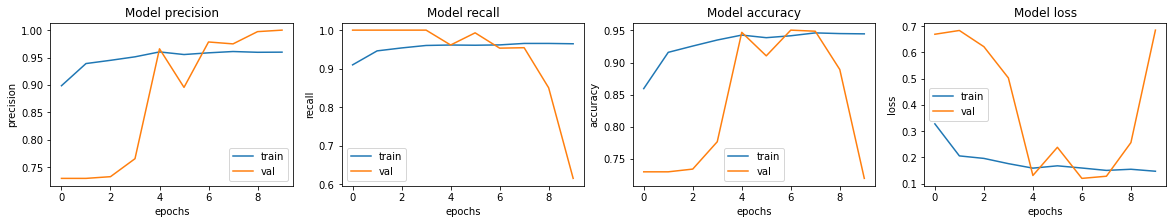

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(test.history[met])
    ax[i].plot(test.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

plt.show()

#Feature Extraction


In [ ]:
class FeatureExtractor:
    def __init__(self, model):
        self.model = model
    
    def extract(self, img):
        img = img.resize((180, 180))
        img = img.convert('RGB')
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        feature = self.model.predict(x)[0]
        
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor(load_model('/content/drive/MyDrive/tkc/Model/ModelCNNv6.h5', compile=False))

In [ ]:
base_dir = '/content/drive/MyDrive/tkc/resize_300'
feature_dir = '/content/drive/MyDrive/tkc/feature_extract'

img_paths = list()
features = list()

for img_path in sorted(Path(base_dir).glob("*.jpeg")):
    img_paths.append(img_path)
    feature = fe.extract(img=Image.open(img_path))
    features.append(feature)

features = np.array(features)
np.save(feature_dir + '/extracted_feature_vgg19.npy', features)

NameError: ignored

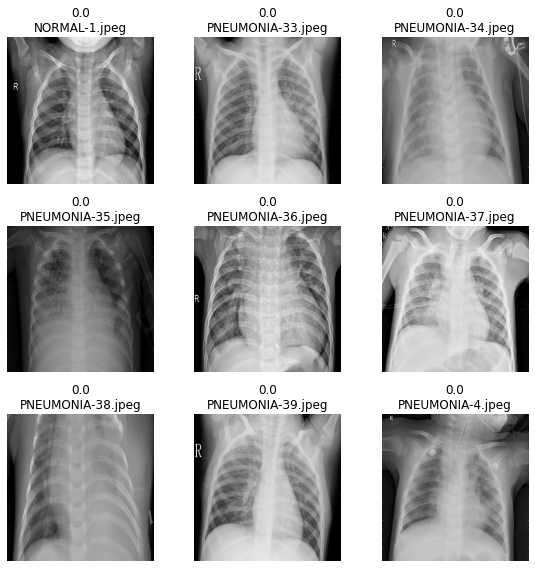

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

query_image = img_paths[190]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()

In [ ]:
#test
loss, acc, prec, rec = model.evaluate(x_val, y_val)
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

NameError: ignored